#### SVM

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print(y_test)
from sklearn.metrics import accuracy_score
print(f'정확도 : {accuracy_score(y_test,predictions):.4f}')

[2 1 2 2 1 2 2 1 2 1 1 0 1 0 2 0 2 1 0 1 0 0 1 2 2 0 2 1 0 0 0 1 1 1 0 1 2
 2 1 0 2 2 2 0 2 1 1 0 0 0 1 2 0 2 2 0 2 1 1 1 1 0 0 0 0 1 0 1 2 1 2 2 1 1
 2]
정확도 : 0.9600


#### KNN

In [4]:
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


In [6]:
for i in range(len(iris.target)):
    print(f'example %d: label %s, feature %s' %(i,iris.target[i],iris.data[i]))

example 0: label 0, feature [5.1 3.5 1.4 0.2]
example 1: label 0, feature [4.9 3.  1.4 0.2]
example 2: label 0, feature [4.7 3.2 1.3 0.2]
example 3: label 0, feature [4.6 3.1 1.5 0.2]
example 4: label 0, feature [5.  3.6 1.4 0.2]
example 5: label 0, feature [5.4 3.9 1.7 0.4]
example 6: label 0, feature [4.6 3.4 1.4 0.3]
example 7: label 0, feature [5.  3.4 1.5 0.2]
example 8: label 0, feature [4.4 2.9 1.4 0.2]
example 9: label 0, feature [4.9 3.1 1.5 0.1]
example 10: label 0, feature [5.4 3.7 1.5 0.2]
example 11: label 0, feature [4.8 3.4 1.6 0.2]
example 12: label 0, feature [4.8 3.  1.4 0.1]
example 13: label 0, feature [4.3 3.  1.1 0.1]
example 14: label 0, feature [5.8 4.  1.2 0.2]
example 15: label 0, feature [5.7 4.4 1.5 0.4]
example 16: label 0, feature [5.4 3.9 1.3 0.4]
example 17: label 0, feature [5.1 3.5 1.4 0.3]
example 18: label 0, feature [5.7 3.8 1.7 0.3]
example 19: label 0, feature [5.1 3.8 1.5 0.3]
example 20: label 0, feature [5.4 3.4 1.7 0.2]
example 21: label 0, fe

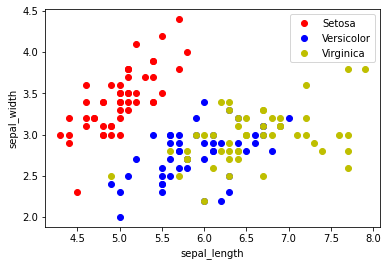

In [8]:
import matplotlib.pyplot as plt
sepal = iris.data[:,0:2]
kind = iris.target
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.plot(sepal[kind==0][:,0], sepal[kind==0][:,1],"ro",label='Setosa')
plt.plot(sepal[kind==1][:,0], sepal[kind==1][:,1],"bo",label='Versicolor')
plt.plot(sepal[kind==2][:,0], sepal[kind==2][:,1],"yo",label='Virginica')
plt.legend()

In [9]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test,y_pred)
scores

0.9666666666666667

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
classes = {0:'setosa',1:'versicolor',2:'virginica'}

x_new = [[3,4,5,2],[5,4,2,2]]
y_predict = knn.predict(x_new)
y_predict

array([1, 0])

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
classes = {0:'setosa',1:'versicolor',2:'virginica'}

x_new = [[3,4,5,2],[5,4,2,2]]
y_predict = knn.predict(x_new)
y_predict

array([2, 0])

In [22]:
print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


#### 파이프라인

In [27]:
from sklearn.datasets import make_regression,make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from modules import DtPre

from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np


titanic_df = pd.read_csv('datasets/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = DtPre.transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                            test_size=0.2, random_state=5)
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
	])

pipeline.fit(X_train,y_train)

y_preds = pipeline.predict(X_test)

np.round(accuracy_score(y_test,y_preds),4)

0.8101

In [28]:
scaler = StandardScaler()
scaler.fit(X_titanic_df)
titanic_scaled = scaler.transform(X_titanic_df)
#transform() 하면 scale 변환된 데이터 셋이 numpy ndarray로 반환되어
# 이를 DataFrame으로 변환해야함
titanic_df_scaled = pd.DataFrame(data=titanic_scaled, columns=X_titanic_df.keys())
X_train, X_test, y_train, y_test = train_test_split(titanic_df_scaled, y_titanic_df, \
                                            test_size=0.2, random_state=5)
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression 정확도 : {accuracy_score(y_test,lr_pred):.4f}')

LogisticRegression 정확도 : 0.8101


In [23]:
titanic_df_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.511293,0.562734
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.914491,-2.008526
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.511293,0.562734
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,-1.914491,0.562734
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.511293,0.562734
...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671,0.511293,0.562734
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381,-2.399648,0.562734
888,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263,0.511293,0.562734
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381,-1.914491,-2.008526
